## Living Cost and Food Survey: Exploratory Data Analysis

This script contains the following:
    
#### 01. Importing Libraries and Data
#### 02. Creating a Subset of the Data to Explore
###### Check the dataframe
#### 03. Exploring Realtionships
* Correlation Matrices
* Further refine the subset for visual analysis

#### 04. New categorical variables
* Children, Adults and People
* Income Source

###### Change directory to store visual analysis
#### 05. Heatmaps
##### Correlation Relationships
#### 06. Pair Plots
#### 07. Scatterplots
* Further exploration of total food cost and food category variables.
* Exploration by children group
* Exploration by household type
* Exploration by income type

#### 08. Categorical Plots
* By children group
* By adult group
* By income type

#### 09. Exporting the dataframe as lcf_analysis_eda
#### 10. Questions
##### Previous questions
###### Answering Question's 4 and 5
##### New Questions
---

## 01. Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

# To display the charts in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
# Use the os.path.join() function to import the lcf_analysis.pkl file as pandas a dataframe and view first fifthteen rows
df_lcf_analysis = pd.read_pickle(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'lcf_analysis.pkl'))
df_lcf_analysis.head(15)

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,...,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
0,1,1,Index,January to March,173.270000,Eastern,179.684359,1.0,173.270,173.2700,...,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,37.750485,0.711054,56.147382
1,2,5,Index,July to September,333.667857,North West and Merseyside,1117.340000,2.8,1117.340,934.2700,...,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,17.463803,2.114853,42.638686
2,3,2,Index,January to March,678.860000,North West and Merseyside,1269.120000,1.5,732.740,1018.2900,...,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,27.755326,4.935850,27.837721
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.000,288.0000,...,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,28.595960,7.838384,24.191919
4,5,3,Index,April to June,375.455000,North West and Merseyside,922.302564,2.0,911.700,750.9100,...,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,7.527209,2.498936,33.103302
5,6,4,Index,July to September,254.204000,South East,719.120000,2.5,719.120,635.5100,...,8339.835694,44028.146914,0.000000,44028.146914,786.446068,92.277452,1133.217217,9.429995,1.106466,13.588004
6,7,1,Index,July to September,430.716400,Eastern,545.270577,1.0,499.770,430.7164,...,316.637369,4992.797215,0.000000,4992.797215,96.297330,13.911332,35.473896,30.412497,4.393459,11.203320
7,8,1,Index,October to December,434.121200,South West,544.506146,1.0,523.950,434.1212,...,800.843774,5060.872092,0.000000,5060.872092,85.762104,44.027604,389.002227,10.708968,5.497652,48.574047
8,9,2,Index,April to June,1004.068000,Wales,1863.292000,1.5,1863.292,1506.1020,...,1169.910709,3590.546326,0.000000,3590.546326,313.551775,211.472312,313.551775,26.801342,18.075936,26.801342
9,10,2,Index,April to June,858.526667,London,1726.290000,1.5,0.000,1287.7900,...,7082.301474,25763.427321,0.000000,25763.427321,774.771086,66.371239,661.261182,10.939538,0.937142,9.336812


In [4]:
# Checking the shape of the dataframe
df_lcf_analysis.shape

(26146, 43)

---

## 02. Create a Subset of the Data to Explore

**The subset of the data will contain the weighted variables for income, costs and expenditure along with the household information (see below). Plus three new columns wiht the percentage spent on unprocessed, processed and ultra_processed food.**

*['no_people',  'year', 'household_type', 'no_children', 'no_adult', 'no_households', 'W_OECD_disposable_income','W_total_income', 'W_gross_income', 'W_weekly_disposable_income', 'W_adult_food_cost', 'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure', 'W_child_total_expenditure', 'W_total_expenditure', 'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food']*<br>


In [5]:
# View all the columns within the dataframe df_lcf_analysis
df_lcf_analysis.columns

Index(['unique_id', 'no_people', 'household_type', 'quarter',
       'OECD_disposable_income', 'region', 'total_income', 'OECD_scale',
       'gross_income', 'weekly_disposable_income', 'income_source',
       'adult_food_cost', 'child_food_cost', 'total_food_cost',
       'adult_total_expenditure', 'child_total_expenditure',
       'total_expenditure', 'eng_rural_urb', 'scot_rural_urb',
       'quarterly_weight', 'year', 'no_children', 'no_adult',
       'unprocessed_food', 'processed_food', 'ultra_processed_food',
       'no_households', 'W_OECD_disposable_income', 'W_total_income',
       'W_gross_income', 'W_disposable_income', 'W_adult_food_cost',
       'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure',
       'W_child_total_expenditure', 'W_total_expenditure',
       'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food',
       '%unprocessed_food', '%processed_food', '%ultra_processed_food'],
      dtype='object')

In [6]:
# Create a subset df_lcf_analysisW of the df_lcf_analysis dataframe with the specified columns
df_lcf_analysisW = df_lcf_analysis[['no_people', 'household_type', 'year', 'no_children', 'no_adult', 'income_source', 'W_gross_income', 'W_disposable_income', 
                                    'W_adult_food_cost', 'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure', 'W_total_expenditure', 
                                    'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food', '%unprocessed_food', '%processed_food', '%ultra_processed_food']]
df_lcf_analysisW.head()

,no_people,household_type,year,no_children,no_adult,income_source,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
0,1,Index,2016,0,1,Self-employment inc.,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,2511.076176,373.039988,7.026438,554.833106,37.750485,0.711054,56.147382
1,5,Index,2015,1,4,Wages salaries,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,13300.786598,323.283563,39.149384,789.311802,17.463803,2.114853,42.638686
2,2,Index,2016,0,2,Wages salaries,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,16984.800931,748.575896,133.122488,750.798131,27.755326,4.935850,27.837721
3,3,Index,2015,2,1,Social sec. benefits,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,9216.451707,224.321967,61.488466,189.774324,28.595960,7.838384,24.191919
4,3,Index,2015,1,2,Wages salaries,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,10127.284984,196.333554,65.180202,863.439444,7.527209,2.498936,33.103302


#### Check the dataframe

In [7]:
# View the shape of the dataframe
df_lcf_analysisW.shape

(26146, 19)

In [8]:
# View the data types
df_lcf_analysisW.dtypes

no_people                      int64
household_type                object
year                           int64
no_children                    int64
no_adult                       int64
income_source                 object
W_gross_income               float64
W_disposable_income          float64
W_adult_food_cost            float64
W_child_food_cost            float64
W_total_food_cost            float64
W_adult_total_expenditure    float64
W_total_expenditure          float64
W_unprocessed_food           float64
W_processed_food             float64
W_ultra_processed_food       float64
%unprocessed_food            float64
%processed_food              float64
%ultra_processed_food        float64
dtype: object

In [9]:
# Check for missing values
df_lcf_analysisW.isnull().sum()

no_people                    0
household_type               0
year                         0
no_children                  0
no_adult                     0
income_source                0
W_gross_income               0
W_disposable_income          0
W_adult_food_cost            0
W_child_food_cost            0
W_total_food_cost            0
W_adult_total_expenditure    0
W_total_expenditure          0
W_unprocessed_food           0
W_processed_food             0
W_ultra_processed_food       0
%unprocessed_food            0
%processed_food              0
%ultra_processed_food        0
dtype: int64

---

## 03. Exploring Relationships

### Correlation Matrices

In [10]:
# Create a correlation matrix using pandas

df_lcf_analysisW.corr()

,no_people,year,no_children,no_adult,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
no_people,1.000000,-0.011373,0.809804,0.668644,0.333560,0.364502,0.425103,0.340488,0.438253,0.332776,0.337281,0.365872,0.282200,0.421130,-0.068475,-0.046549,-0.110933
year,-0.011373,1.000000,-0.012295,-0.003694,0.035401,0.019357,0.011683,-0.001712,0.012152,-0.006354,-0.006300,0.004972,0.025576,0.017339,-0.018398,0.009173,0.009209
no_children,0.809804,-0.012295,1.000000,0.105210,0.097529,0.106573,0.173255,0.393986,0.191989,0.116379,0.122407,0.157426,0.128568,0.214919,-0.057563,-0.029245,-0.029254
no_adult,0.668644,-0.003694,0.105210,1.000000,0.441772,0.482756,0.500962,0.077786,0.499507,0.416553,0.416548,0.420628,0.315378,0.441423,-0.043110,-0.041835,-0.150953
W_gross_income,0.333560,0.035401,0.097529,0.441772,1.000000,0.955322,0.675348,0.099723,0.673147,0.720508,0.720581,0.530567,0.454377,0.520864,-0.093052,-0.027126,-0.228126
W_disposable_income,0.364502,0.019357,0.106573,0.482756,0.955322,1.000000,0.708644,0.112640,0.706621,0.745857,0.746019,0.560320,0.473728,0.556015,-0.094620,-0.028705,-0.230320
W_adult_food_cost,0.425103,0.011683,0.173255,0.500962,0.675348,0.708644,1.000000,0.196523,0.998338,0.724838,0.725989,0.774050,0.648367,0.807366,-0.138753,-0.060416,-0.235597
W_child_food_cost,0.340488,-0.001712,0.393986,0.077786,0.099723,0.112640,0.196523,1.000000,0.241201,0.121926,0.133843,0.176148,0.123328,0.213044,-0.072751,-0.066694,-0.055412
W_total_food_cost,0.438253,0.012152,0.191989,0.499507,0.673147,0.706621,0.998338,0.241201,1.000000,0.723247,0.725131,0.774985,0.648225,0.808658,-0.141139,-0.063406,-0.236459
W_adult_total_expenditure,0.332776,-0.006354,0.116379,0.416553,0.720508,0.745857,0.724838,0.121926,0.723247,1.000000,0.999779,0.553537,0.467430,0.552613,-0.119509,-0.047373,-0.246540


### Further refine the subset for visual analysis
* Remove year no strong correlation.
* Remove child food cost only strongly correlated with no. of children and child total expenditure.
* Remove child food total expenditure only strongly correlated with no. of children and child food cost.
* Remove adult food cost and adult total expenditure - both account for most of the totals.
* Keep no. of people, children and adults to use as categories.

In [11]:
# Create a subset df_lcf_analysisW of the df_lcf_analysis dataframe with the specified columns
df_lcf_analysisW = df_lcf_analysis[['no_people', 'household_type', 'no_children', 'no_adult', 'W_OECD_disposable_income', 'income_source', 'W_total_income',
                                    'W_gross_income', 'W_disposable_income', 'W_total_food_cost', 'W_total_expenditure', 'W_unprocessed_food', 'W_processed_food', 
                                    'W_ultra_processed_food', '%unprocessed_food', '%processed_food', '%ultra_processed_food']]
df_lcf_analysisW.head()

,no_people,household_type,no_children,no_adult,W_OECD_disposable_income,income_source,W_total_income,W_gross_income,W_disposable_income,W_total_food_cost,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
0,1,Index,0,1,4427.167040,Self-employment inc.,4591.058300,4427.167040,4427.167040,988.172709,2511.076176,373.039988,7.026438,554.833106,37.750485,0.711054,56.147382
1,5,Index,1,4,10048.377621,Wages salaries,33648.593987,33648.593987,28135.457340,1851.163542,13300.786598,323.283563,39.149384,789.311802,17.463803,2.114853,42.638686
2,2,Index,0,2,14367.493149,Wages salaries,26859.842833,15507.817415,21551.239724,2697.053132,16984.800931,748.575896,133.122488,750.798131,27.755326,4.935850,27.837721
3,3,Index,2,1,2852.557690,Social sec. benefits,6203.921362,4564.092304,4564.092304,784.453365,9216.451707,224.321967,61.488466,189.774324,28.595960,7.838384,24.191919
4,3,Index,1,2,5954.314567,Wages salaries,14626.731813,14458.586491,11908.629135,2608.318219,10127.284984,196.333554,65.180202,863.439444,7.527209,2.498936,33.103302


---

## 04. New categorical variables

### Children, Adults and People

Creating childen yes or no

In [12]:
#View the current values 
df_lcf_analysisW['no_children'].value_counts(dropna = False)

0    18412
1     3349
2     3199
3      877
4      238
5       59
6       10
7        2
Name: no_children, dtype: int64

In [13]:
# Adding a new flag 'children' for households with and without children
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] == 0), 'children'] = 'No'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] != 0), 'children'] = 'Yes'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/302483551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] == 0), 'children'] = 'No'


In [14]:
df_lcf_analysisW['children'].value_counts(dropna = False)

No     18412
Yes     7734
Name: children, dtype: int64

Creating childen grouped by no. in household - 1, 2, 3, 4+

In [15]:
# Adding a new flag 'children_grp' for no children in household
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] == 1), 'children_grp'] = 'one child'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] > 1) & (df_lcf_analysisW['no_children'] < 4), 'children_grp'] = '2 or 3 children'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] >= 4), 'children_grp'] = '4+ children'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] == 0), 'children_grp'] = 'none'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/2333570814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['no_children'] == 1), 'children_grp'] = 'one child'


In [16]:
df_lcf_analysisW['children_grp'].value_counts(dropna = False)

none               18412
2 or 3 children     4076
one child           3349
4+ children          309
Name: children_grp, dtype: int64

Creating adults grouped by no. in household 1, 2, 3+

In [17]:
#View the current values 
df_lcf_analysisW['no_adult'].value_counts(dropna = False)

2    14789
1     8429
3     2157
4      614
5      115
6       33
7        7
8        2
Name: no_adult, dtype: int64

In [18]:
# Adding a new flag 'adult_grp' for no adults in household
df_lcf_analysisW.loc[(df_lcf_analysisW['no_adult'] == 1), 'adult_grp'] = 'one adult'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_adult'] == 2), 'adult_grp'] = 'two adults'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_adult'] >= 3), 'adult_grp'] = '3+ adults'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/2301967513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['no_adult'] == 1), 'adult_grp'] = 'one adult'


In [19]:
df_lcf_analysisW['adult_grp'].value_counts(dropna = False)

two adults    14789
one adult      8429
3+ adults      2928
Name: adult_grp, dtype: int64

Creating people grouped by no. in household 1, 2, 3, 4, 5, 6+

In [20]:
#View the current values 
df_lcf_analysisW['no_people'].value_counts(dropna = False)

2    10019
1     7059
3     4054
4     3490
5     1066
6      322
7      103
8       28
9        5
Name: no_people, dtype: int64

In [21]:
# Adding a new flag 'children' for no people in household
df_lcf_analysisW.loc[(df_lcf_analysisW['no_people'] == 1), 'people_grp'] = 'one person'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_people'] == 2), 'people_grp'] = 'two people'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_people'] > 2) & (df_lcf_analysisW['no_people'] < 6), 'people_grp'] = '3-5 people'
df_lcf_analysisW.loc[(df_lcf_analysisW['no_people'] >= 6), 'people_grp'] = '6+ people'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/605982918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['no_people'] == 1), 'people_grp'] = 'one person'


In [22]:
df_lcf_analysisW['people_grp'].value_counts(dropna = False)

two people    10019
3-5 people     8610
one person     7059
6+ people       458
Name: people_grp, dtype: int64

### Income Source

In [23]:
#View the current values 
df_lcf_analysisW['income_source'].value_counts(dropna = False)

Wages salaries          13636
Social sec. benefits     6949
Annuities pensions       3269
Self-employment inc.     1617
Investment income         395
Income-other sources      223
Not recorded               57
Name: income_source, dtype: int64

In [24]:
# Adding a new flag 'income_source' 
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Wages salaries'), 'income_type'] = 'Wages salaries'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Social sec. benefits'), 'income_type'] = 'Social sec. benefits'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Annuities pensions'), 'income_type'] = 'Annuities pensions'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Self-employment inc.'), 'income_type'] = 'Self-employment inc.'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Investment income'), 'income_type'] = 'Income-other sources'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Income-other sources'), 'income_type'] = 'Income-other sources'
df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Not recorded'), 'income_type'] = 'Income-other sources'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/377449304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['income_source'] == 'Wages salaries'), 'income_type'] = 'Wages salaries'


In [25]:
df_lcf_analysisW['income_type'].value_counts(dropna = False)

Wages salaries          13636
Social sec. benefits     6949
Annuities pensions       3269
Self-employment inc.     1617
Income-other sources      675
Name: income_type, dtype: int64

### Ultra-processed Food

In [26]:
#View the current values 
df_lcf_analysisW['%ultra_processed_food'].describe()

count    26146.000000
mean        33.283819
std         14.722402
min          0.000000
25%         22.940254
50%         32.030204
75%         42.413428
max        100.000000
Name: %ultra_processed_food, dtype: float64

In [27]:
# Adding a new flag 'children' for no people in household
df_lcf_analysisW.loc[(df_lcf_analysisW['%ultra_processed_food'] < 25), 'ultra_processed_grp'] = 'low ultra-processed'
df_lcf_analysisW.loc[(df_lcf_analysisW['%ultra_processed_food']> 25) & (df_lcf_analysisW['%ultra_processed_food'] < 50), 'ultra_processed_grp'] = 'medium ultra-processed'
df_lcf_analysisW.loc[(df_lcf_analysisW['%ultra_processed_food'] > 50), 'ultra_processed_grp'] = 'high ultra-processed'

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_95477/495690130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lcf_analysisW.loc[(df_lcf_analysisW['%ultra_processed_food'] < 25), 'ultra_processed_grp'] = 'low ultra-processed'


In [28]:
#View the current values 
df_lcf_analysisW['ultra_processed_grp'].value_counts()

medium ultra-processed    14840
low ultra-processed        7933
high ultra-processed       3370
Name: ultra_processed_grp, dtype: int64

In [29]:
# View the shape of the dataframe
df_lcf_analysisW.shape

(26146, 23)

#### Change directory to store visual analysis

In [30]:
# Change the working directory and show directory path
os.chdir(r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/04_Analysis')
os.getcwd()

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/04_Analysis'

---

## 05. Heatmaps

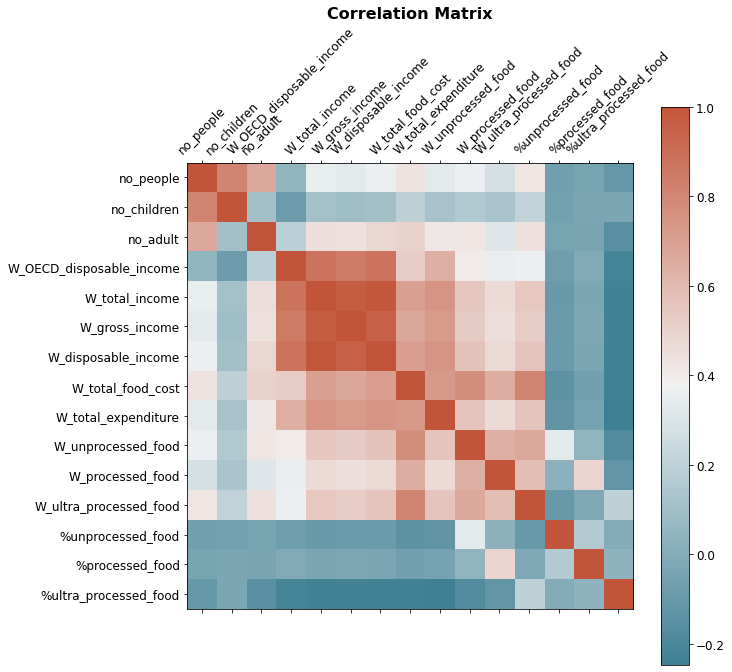

In [31]:
# Create a correlation heatmap using matplotlib

df = df_lcf_analysisW

# Add labels, a legend, and change the size of the heatmap
fg = plt.figure(figsize=(10, 10)) # figure size 

color = sns.diverging_palette(220, 20, as_cmap=True)

plt.matshow(df.corr(), fignum = fg.number, cmap = color)  # type of plot
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)

cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=16, fontweight = 'bold') # add title

plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

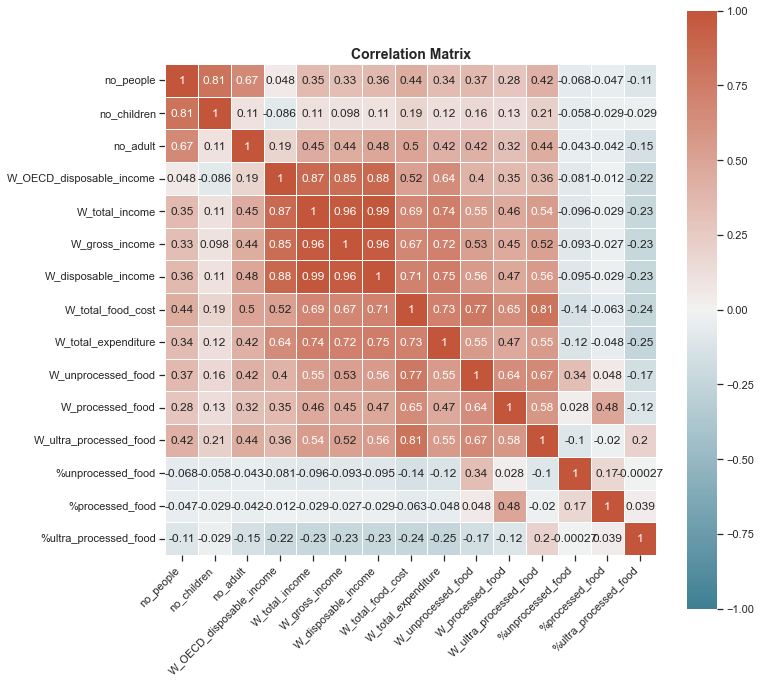

In [32]:
# Create a correlation heatmap using seaborn

# set the theme
sns.set_theme(style="white")
sns.set_style({'xtick.bottom': True}, {'ytick.left': True}) #- adds tick marks not used

# compute the correlation matrix
corr = df_lcf_analysisW.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    square=True,
    linewidths=.5,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix', fontsize=14, fontweight = 'bold') # add title

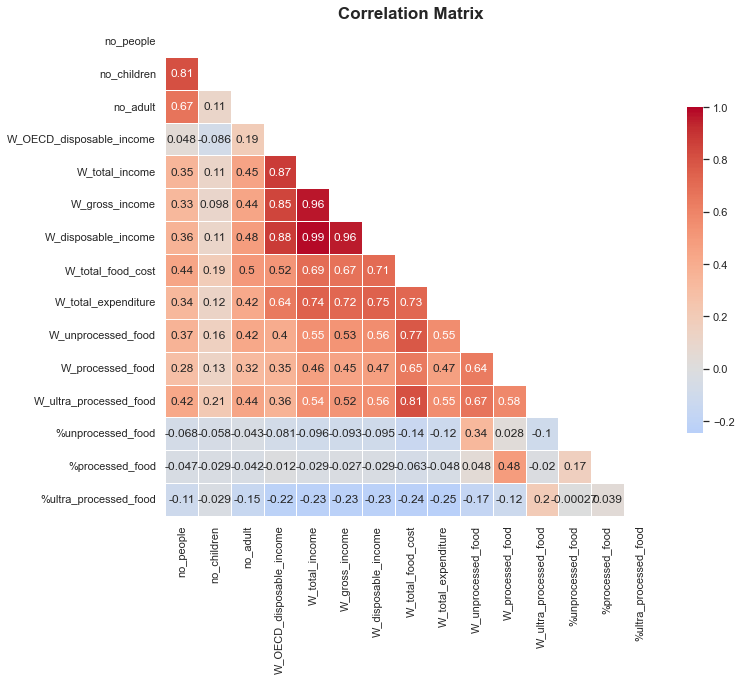

In [33]:
# Create a heatmap in seaborn masking the upper triangle

# set the theme
sns.set_theme(style="white")
#sns.set_style({'xtick.bottom': True}, {'ytick.left': True}) - adds tick marks not used

# Compute the correlation matrix
corr = df_lcf_analysisW.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 20, as_cmap=True) - color palette not used too light
cmap = sns.color_palette('coolwarm', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, annot = True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4})

#add the title and column names as labels
plt.title('Correlation Matrix', fontsize = 17, fontweight = 'bold')
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)


# Exporting the correlation heatmap
plt.savefig("Correlation_Matrix.png", bbox_inches='tight') 

plt.show()

### Correlation Relationships
* 0: no relationship
* 0.1–0.3: weak relationship
* 0.3–0.5: moderate relationship
* 0.5–1.0: strong relationship

The heatmap shows strong positive relationships between the income variables - gross, net and disposable - ranging from 0.87 to 0.99. In other words, if you earn a higher income you are more likely to have more disposable income.<br>
Total food costs also have a strong relationship with these income variables, as does total expenditure. The higher the income the higher the total expenditure and the greater the amount of money spent on food.<br>
All food groups have a strong positive relationship with total food cost - the more food bought in these categories the higher the total food cost. Ultra-processed food has the strongest correlation (0.81) with total food cost.<br>

---

## 06. Pair Plots

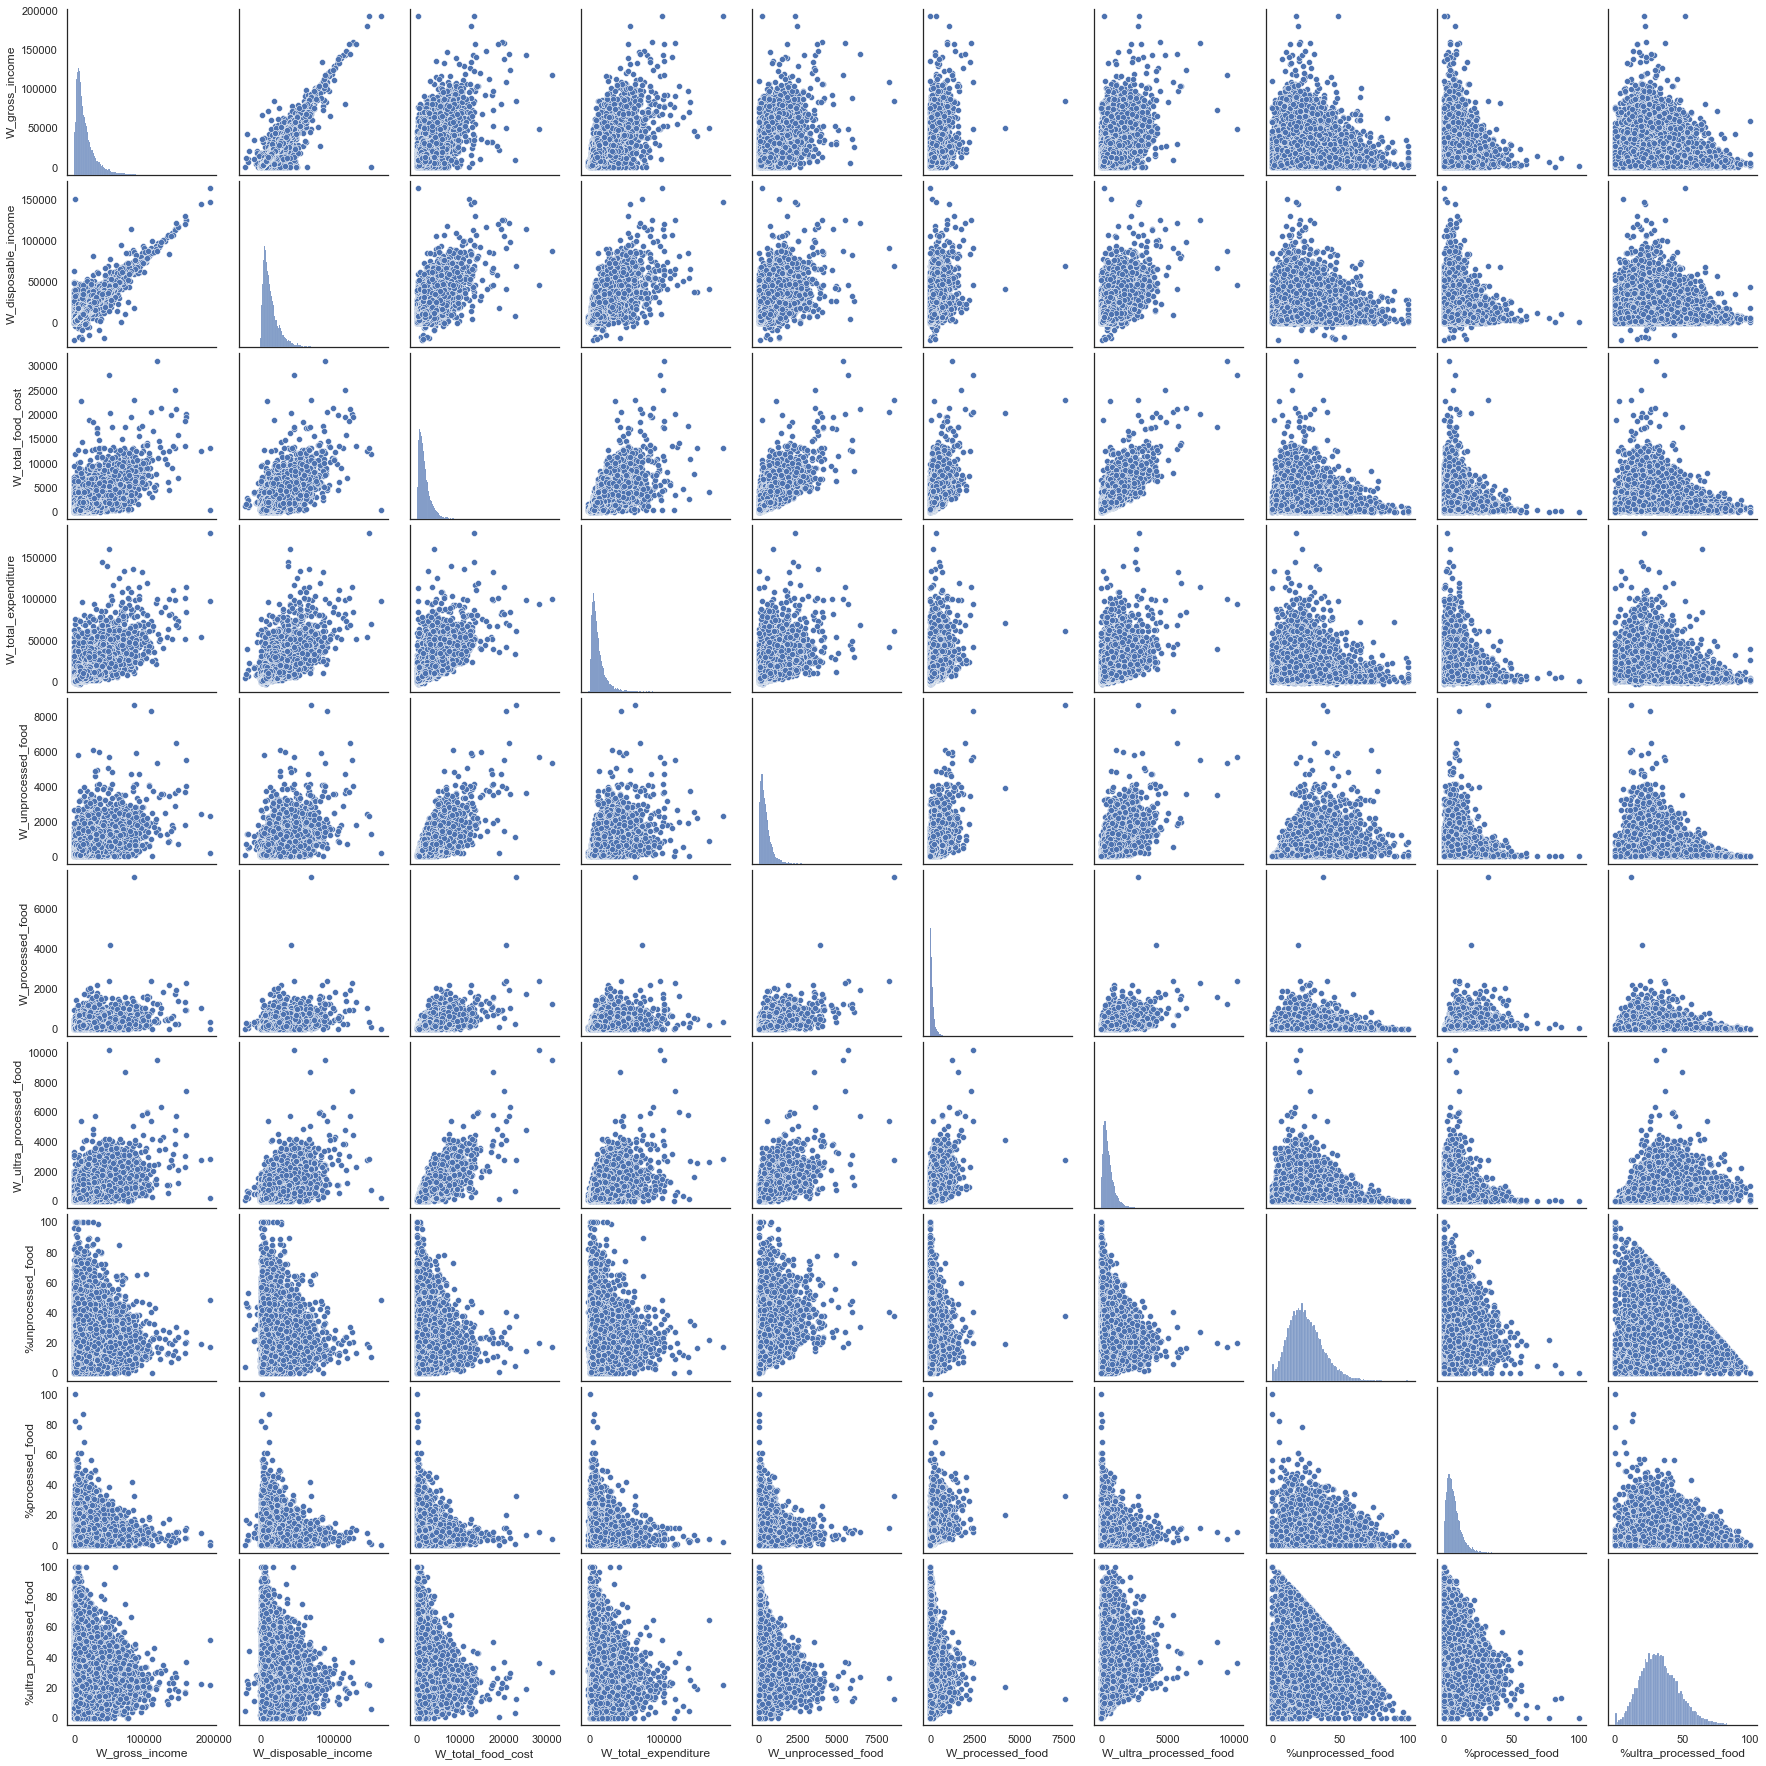

In [34]:
# Specify the variables in the pair plot and create

lcf_corr = df_lcf_analysisW[['W_gross_income', 'W_disposable_income', 'W_total_food_cost', 'W_total_expenditure', 'W_unprocessed_food',
                             'W_processed_food', 'W_ultra_processed_food', '%unprocessed_food', '%processed_food', '%ultra_processed_food']]

g = sns.pairplot(lcf_corr)

# Exporting the correlation heatmap
g.savefig("PairPlots.png", bbox_inches='tight') 

The pair plots show the distribution of the of the variables and their relationship to the other variables. <br>

The income and expenditure variables have a right (positively) skewed distribution. The mean is to the right of the median and the mode. This is because most incomes and expenditure are above zero with the extreme values more frequently at the high end of the scale. The % ultra-processed and % unprocessed food variables have normal distributions. <br>

The scatterplots show the relationship between the variables. The strongest linear correlation is between total income and disposable income, which was also shown in the correlation matrices above. Ultra-processed food has a strong linear relationship with total food cost, which can be seen in the pair plot above. No obvious non-linear relationships are revealed in the pair plots.<br>

---

After looking at the pairplots the following variables will be investigated in more detail - disposable income, total food cost, total expenditure, with spending and percentages of ultra-processed and unprocessed food.

## 07. Scatterplots

### Further exploration of total food cost and food category variables.

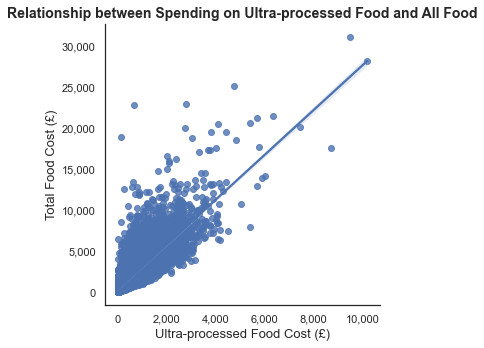

In [35]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_food_cost' columns in seaborn
X = 'W_ultra_processed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW 

fg = sns.lmplot(x = X, y = Y, data = df, ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and All Food', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-processed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_totalfood.png", bbox_inches='tight') 

plt.show()

In [36]:
# Rearrange the 'W_ultra_processed_food' and 'W_total_food_cost'data and apply the linear regression model
X1 = np.array(df[X]).reshape((-1, 1))
Y1 = np.array(df[Y])
model = LinearRegression().fit(X1, Y1)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 339.5817124984328
slope: [2.72431166]


There is a strong linear correlation between spending on ultra-processed foods and total spending on food with the linear equation: <br> **W_total_food_cost = 2.72 * W_ultra_processed_food + 339.48**

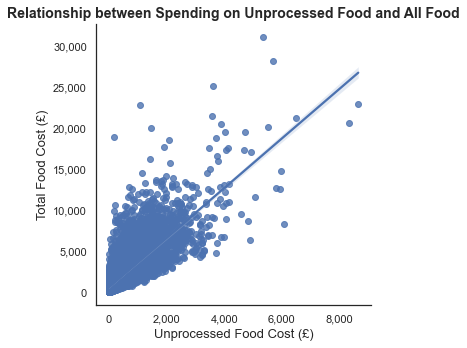

In [37]:
# Create a scatterplot for the 'W_unprocessed_food' and 'W_total_food_cost' columns in seaborn
X = 'W_unprocessed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW

fg = sns.lmplot(x = X, y = Y, data = df, ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Unprocessed Food and All Food', fontsize = 14, fontweight = 'bold')
plt.xlabel('Unprocessed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_un_totalfood.png", bbox_inches='tight') 

plt.show()

In [38]:
# Rearrange the 'W_unprocessed_food' and 'W_total_food_cost' data and apply the linear regression model
X1 = np.array(df[X]).reshape((-1, 1))
Y1 = np.array(df[Y])
model = LinearRegression().fit(X1, Y1)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 568.1714131821527
slope: [3.02068109]


Strong linear correlation between spending on unprocessed foods and total spending on food with more uncertainty as the amount spent on unprocessed food rises. The linear equation: <br> **W_total_food_cost = 3.02 * W_unprocessed_food + 568.09**

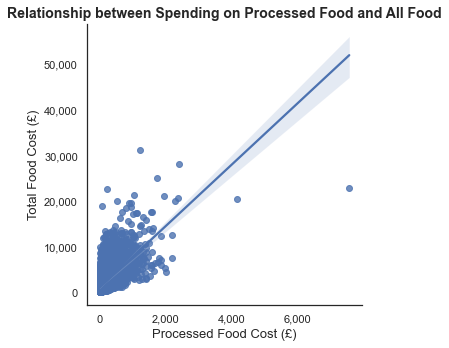

In [39]:
# Create a scatterplot for the 'W_processed_food' and 'W_total_food_cost' columns in seaborn
X = 'W_processed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW

fg = sns.lmplot(x = X, y = Y, data = df, ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Processed Food and All Food', fontsize = 14, fontweight = 'bold')
plt.xlabel('Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_pro_totalfood.png", bbox_inches='tight') 

plt.show()

In [40]:
# Rearrange the 'W_processed_food' and 'W_total_food_cost' data and apply the linear regression model
X1 = np.array(df[X]).reshape((-1, 1))
Y1 = np.array(df[Y])
model = LinearRegression().fit(X1, Y1)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1021.9468095963706
slope: [6.73291704]


The correlation between spending on processed foods and total spending on food with increasing uncertainty as the amount spent on processed food rises. The linear equation: <br> **W_total_food_cost = 6.73 * W_unprocessed_food + 1021.84**

### Exploration by children group

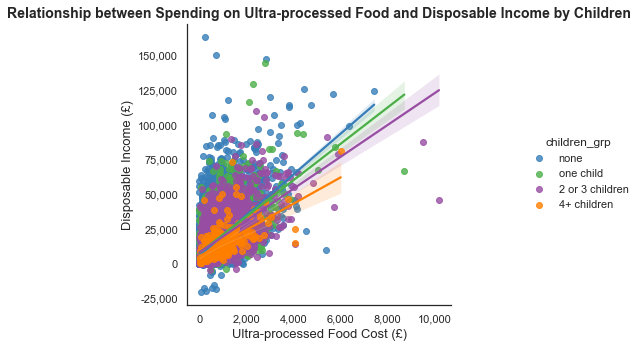

In [41]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_disposable_income' columns by childre_grp in seaborn
X = 'W_ultra_processed_food'
Y = 'W_disposable_income'
df = df_lcf_analysisW
hue = 'children_grp'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue,  palette = sns.color_palette('Set1')[1:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and Disposable Income by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-processed Food Cost (£)', fontsize = 13)
plt.ylabel('Disposable Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_disposable_child.png", bbox_inches='tight') 

plt.show()

There is stronger correlation between spending on ultra-processed food and disposable income in households without children and less uncertainty. Households with 4 or more children have less disposable income and overall spend less on ultra-processed food.

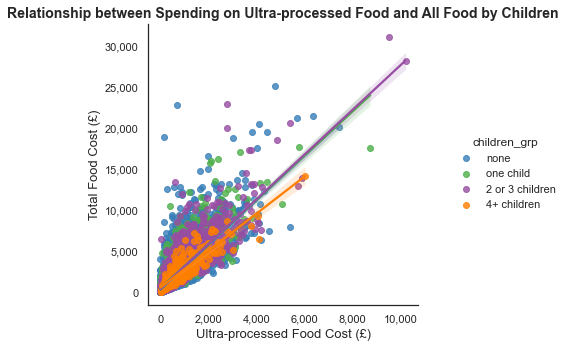

In [42]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_food_cost' columns by 'children_grp' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'children_grp'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set1')[1:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and All Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-processed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_totalfood_child.png", bbox_inches='tight') 

plt.show()

There is no difference in correlation between spending on ultra-processed food and total spending on food in households with one to three children and without children. Households with four or more children have lower total food costs and generally spend less on ultra-processed foods.

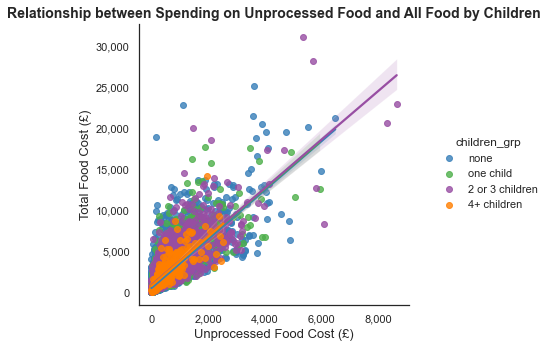

In [43]:
# Create a scatterplot for the 'W_unprocessed_food' and 'W_total_food_cost' columns by 'children_grp' in seaborn
X = 'W_unprocessed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'children_grp'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set1')[1:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Unprocessed Food and All Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Unprocessed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_un_totalfood_child.png", bbox_inches='tight') 

plt.show()

Unlike ultra-processed foods where there is a difference between households with four or more children and other households there is no difference in correlation between spending on unprocessed food and total spending on food in households.

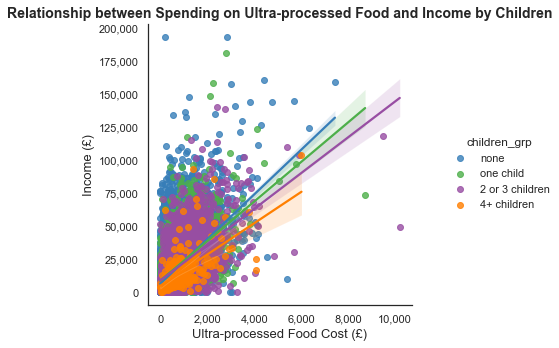

In [44]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_income' columns by 'children_grp' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_gross_income'
df = df_lcf_analysisW
hue = 'children_grp'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set1')[1:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and Income by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-processed Food Cost (£)', fontsize = 13)
plt.ylabel('Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_income_child.png", bbox_inches='tight') 

plt.show()

Similar to disposable income there is a stronger correlation between spending on ultra-processed food and disposable income in households without children and less uncertainty. Households with 4 or more children have less income and overall spend less on ultra-processed food.

### Exploration by household type

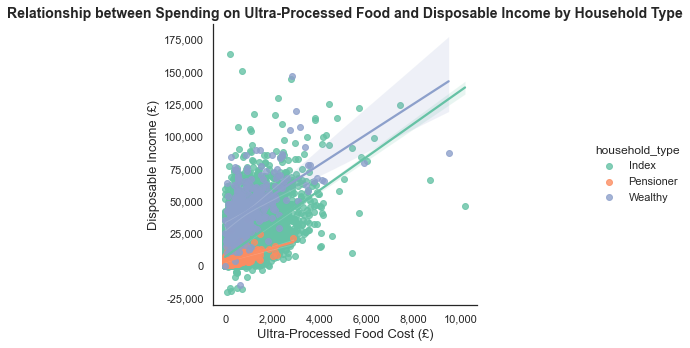

In [45]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_disposable_income' columns by 'household_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_disposable_income'
df = df_lcf_analysisW
hue = 'household_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set2'), ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-Processed Food and Disposable Income by Household Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Disposable Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_disposable_htype.png", bbox_inches='tight') 

plt.show()

The plot shows that there is less correlation between disposable income and spending on ultra-processed food in pensioner households, who have less disposable income and spend less on ultra-processed food.

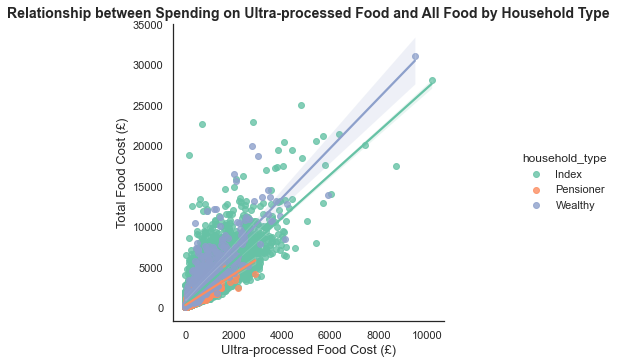

In [46]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_food_cost' columns by 'household_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'household_type'

sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = 'Set2', ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and All Food by Household Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-processed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_totalfood_htype.png", bbox_inches='tight') 

plt.show()

Spending on all food and ultra-processed food is more strongly correlated in wealthy and index households. Index households spend the most on ukltra-processed food.

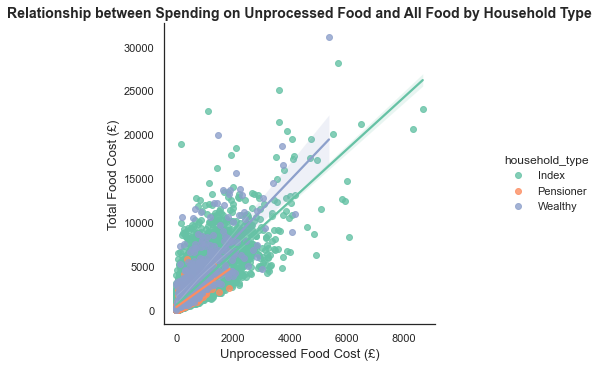

In [47]:
# Create a scatterplot for the 'W_unprocessed_food' and 'W_total_food_cost' columns by household_type in seaborn
X = 'W_unprocessed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'household_type'

sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = 'Set2', ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Unprocessed Food and All Food by Household Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Unprocessed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_un_totalfood_htype.png", bbox_inches='tight') 

plt.show()

Similar to ultra-processed food spending on all food and unprocessed food is more strongly correlated in wealthy and index households. Index households spend the most on unprocessed foods.

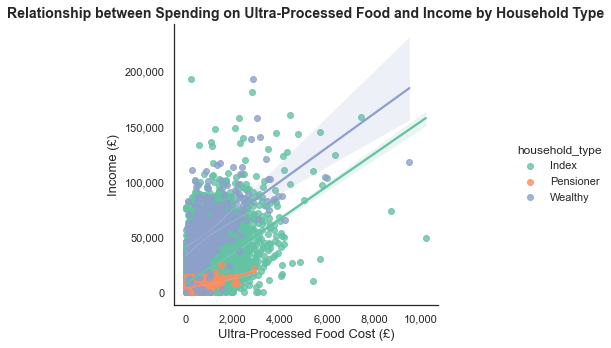

In [48]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_gross_income' columns by 'household_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_gross_income'
df = df_lcf_analysisW
hue = 'household_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set2'), ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-Processed Food and Income by Household Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_income_htype.png", bbox_inches='tight') 

plt.show()

The plot shows that there is less correlation between income and spending on ultra-processed food in pensioner households, who have less income and spend less on ultra-processed food.

### Exploration by income type

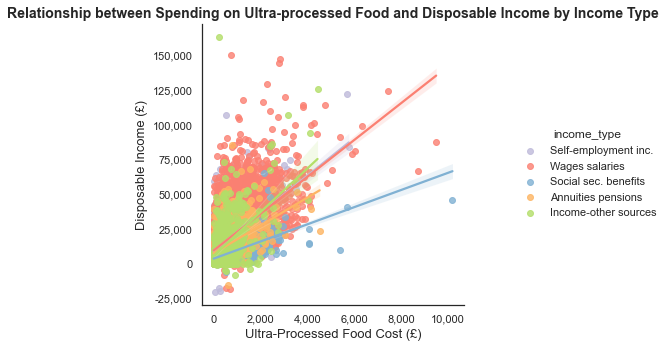

In [49]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_disposable_income' columns by 'income_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_disposable_income'
df = df_lcf_analysisW
hue = 'income_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue,  palette = sns.color_palette('Set3')[2:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-processed Food and Disposable Income by Income Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Disposable Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_disposable_itype.png", bbox_inches='tight') 

plt.show()

There is stronger correlation between spending on ultra-processed food and disposable income in households with income from self employment, wages salaries, and other sources compared to social security benefits. 

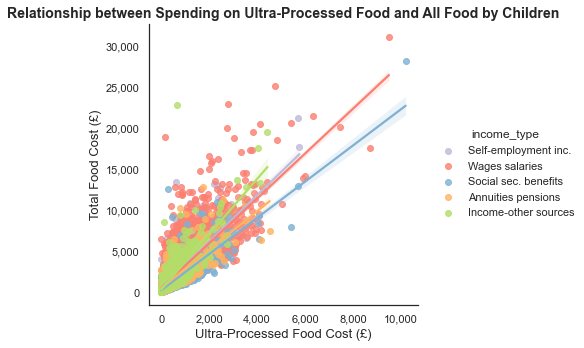

In [50]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_food_cost' columns by 'income_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'income_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set3')[2:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-Processed Food and All Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_totalfood_itype.png", bbox_inches='tight') 

plt.show()

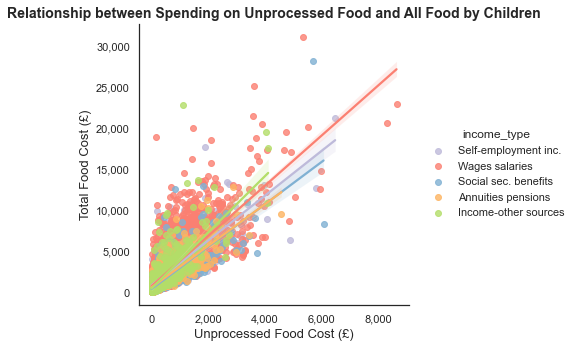

In [51]:
# Create a scatterplot for the 'W_unprocessed_food' and 'W_total_food_cost' columns by 'income_type' in seaborn
X = 'W_unprocessed_food'
Y = 'W_total_food_cost'
df = df_lcf_analysisW
hue = 'income_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set3')[2:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Unprocessed Food and All Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('Unprocessed Food Cost (£)', fontsize = 13)
plt.ylabel('Total Food Cost (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_un_totalfood_itype.png", bbox_inches='tight') 

plt.show()

Unlike ultra-processed food there is not such a marked difference in correlation between spending on food and unprocessed food in households with different income sources.

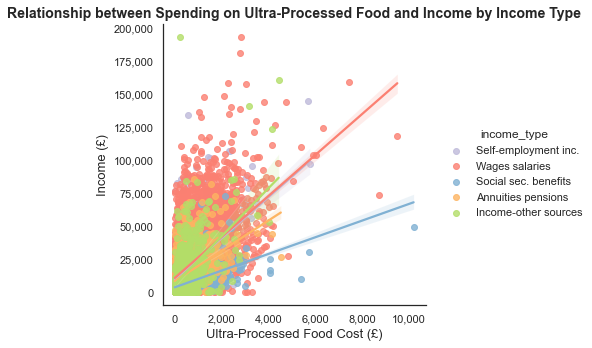

In [52]:
# Create a scatterplot for the 'W_ultra_processed_food' and 'W_total_income' columns by 'income_type' in seaborn
X = 'W_ultra_processed_food'
Y = 'W_gross_income'
df = df_lcf_analysisW
hue = 'income_type'

fg = sns.lmplot(x = X, y = Y, data = df, hue = hue, palette = sns.color_palette('Set3')[2:], ci = 95)

#add the title and axis labels
plt.title('Relationship between Spending on Ultra-Processed Food and Income by Income Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Ultra-Processed Food Cost (£)', fontsize = 13)
plt.ylabel('Income (£)', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Scatter_ultra_income_itype.png", bbox_inches='tight') 

plt.show()

Similar to disposable income there is a stronger correlation between spending on ultra-processed food and total income in households with income from self employment, wages salaries, and other sources compared to social security benefits.

---

## 08. Categorical Plots

### By children group

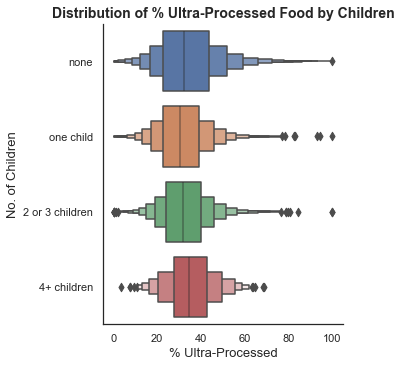

In [53]:
# Create a boxen plot in seaborn to show the distribution of %ultra_processed_food' by 'children_grp' in seaborn

# set up parameters 
X = '%ultra_processed_food'
Y = 'children_grp'
df = df_lcf_analysisW

# create plot
sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Ultra-Processed Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Ultra-Processed', fontsize = 13)
plt.ylabel('No. of Children', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_ultra_child.png", bbox_inches='tight') 

plt.show()

The average family with 4 or more children will buy more ultra-processed food, despite having less disposable income and spending less on all food.

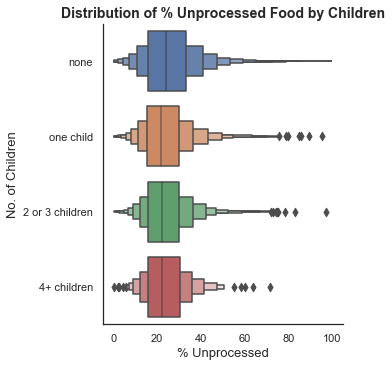

In [54]:
# Create a boxen plot in seaborn to show the distribution of %unprocessed_food' by 'children_grp' in seaborn

# set up parameters and create plot
plt.show()
X = '%unprocessed_food'
Y = 'children_grp'
df = df_lcf_analysisW

sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Unprocessed Food by Children', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Unprocessed', fontsize = 13)
plt.ylabel('No. of Children', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_un_child.png", bbox_inches='tight') 

Families with children buy the same amount of unprocessed food. 

### By adult group

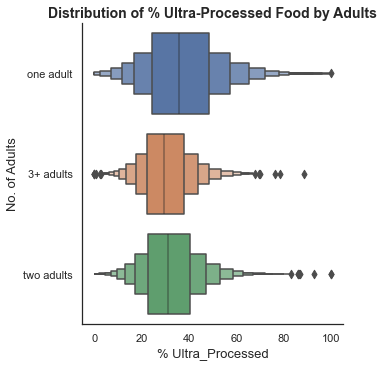

In [55]:
# Create a boxen plot in seaborn to show the distribution of %ultra_processed_food' by 'adult_grp' in seaborn

# set up parameters and create plot
X = '%ultra_processed_food'
Y = 'adult_grp'
df = df_lcf_analysisW

sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Ultra-Processed Food by Adults', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Ultra_Processed', fontsize = 13)
plt.ylabel('No. of Adults', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_ultra_adult.png", bbox_inches='tight') 

The average household with one adult will buy more ultra-processed food than those with two or more adults.

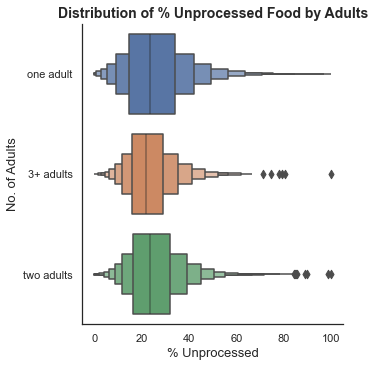

In [56]:
# Create a boxen plot in seaborn to show the distribution of %unprocessed_food' by 'adult_grp' in seaborn

# set up parameters and create plot
X = '%unprocessed_food'
Y = 'adult_grp'
df = df_lcf_analysisW

sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Unprocessed Food by Adults', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Unprocessed', fontsize = 13)
plt.ylabel('No. of Adults', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_un_adult.png", bbox_inches='tight') 

Similar to the number of children there is less variation in the amount of unprocessed food bought by households with different numbers of adults.

### By income type

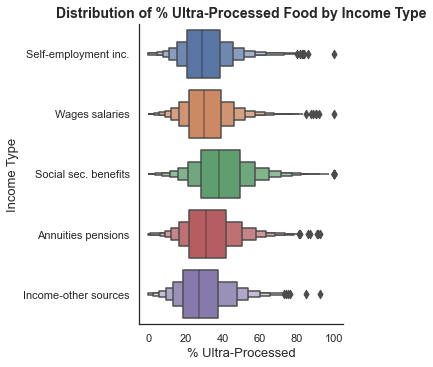

In [57]:
# Create a boxen plot in seaborn to show the distribution of %ultra_processed_food' by 'ancome_type' in seaborn

# set up parameters and create plot
X = '%ultra_processed_food'
Y = 'income_type'
df = df_lcf_analysisW

sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Ultra-Processed Food by Income Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Ultra-Processed', fontsize = 13)
plt.ylabel('Income Type', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_ultra_income.png", bbox_inches='tight') 

The average household on social security benefits will buy more ultra-processed food than those with other income sources. Households with income from annuities and pensions also spend slightly more.

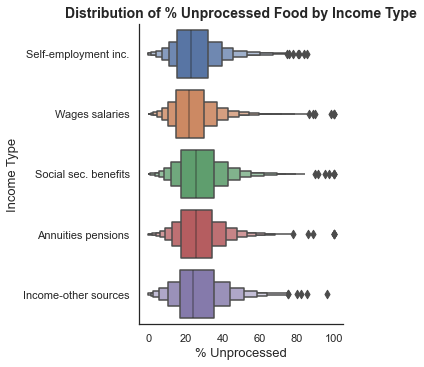

In [58]:
# Create a boxen plot in seaborn to show the distribution of %unprocessed_food' by 'income_type' in seaborn

# set up parameters and create plot
X = '%unprocessed_food'
Y = 'income_type'
df = df_lcf_analysisW

sns.catplot(
    data = df, x = X, y = Y,
    kind = 'boxen')

#add the title and axis labels
plt.title('Distribution of % Unprocessed Food by Income Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('% Unprocessed', fontsize = 13)
plt.ylabel('Income Type', fontsize = 13)
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Boxen_un_income.png", bbox_inches='tight') 

Similar to the other categories there is less variation in the amount of unprocessed food bought by households with different income sources.

### Catplots

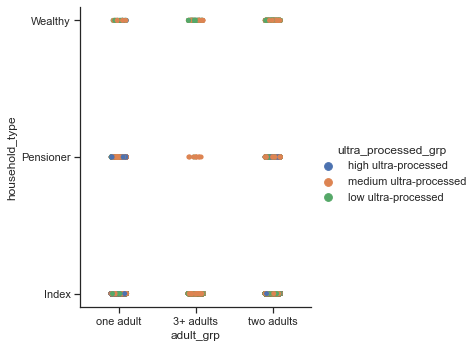

In [59]:
# Create a categorical plot in seaborn for household_type and adult_grp using the %ultra_processed_grp as hue.

Y = "household_type"
X = "adult_grp"
hue = "ultra_processed_grp"

sns.set(style = "ticks")
sns.catplot(y = Y, x = X, hue = hue, data = df)

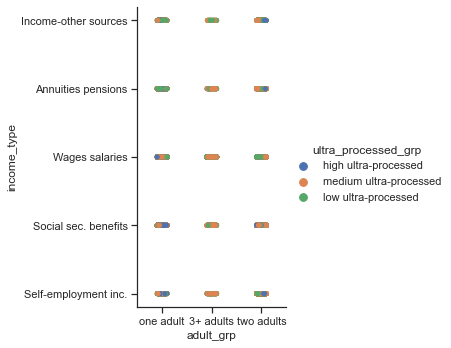

In [60]:
# Create a categorical plot in seaborn for income_type and adult_grp using the %ultra_processed_grp as hue.

Y = "income_type"
X = "adult_grp"
hue = "ultra_processed_grp"

sns.set(style = "ticks")
sns.catplot(y = Y, x = X, hue = hue, data = df)

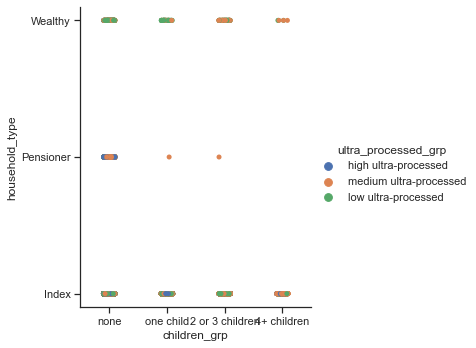

In [61]:
# Create a categorical plot in seaborn for household_type and children_grp using the %ultra_processed_grp as hue.
Y = "household_type"
X = "children_grp"
hue = "ultra_processed_grp"

sns.set(style = "ticks")
sns.catplot(y = Y, x = X, hue = hue, data = df)

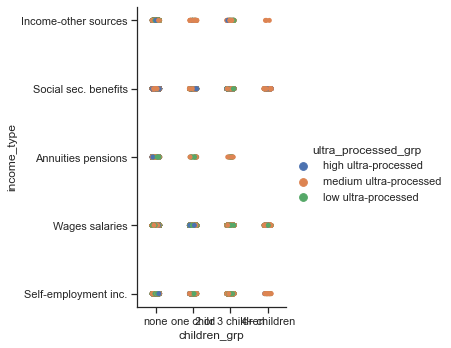

In [62]:
# Create a categorical plot in seaborn for household_type and children_grp using the %ultra_processed_grp as hue.
Y = "income_type"
X = "children_grp"
hue = "ultra_processed_grp"

sns.set(style = "ticks")
g = sns.catplot(y = Y, x = X, hue = hue, data = df)

The catplots don't add anything new and it looks like the data points may be overlapping each other. The swarmplot wouldn't work - too many data points. 

### Stripplots

#### By household type

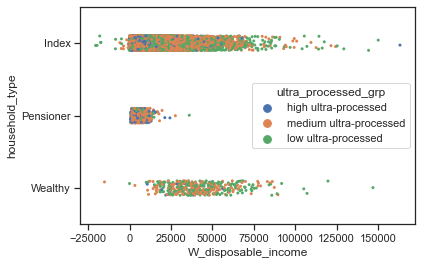

In [63]:
# Create a stripplot in seaborn for household_type and W_disposable_income with ultra_processed_grp as hue

Y = "household_type"
X  = "W_disposable_income"
hue  = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 3)

# Exporting the scatter plot with axis showing
plt.savefig("Stripplot_htype_income.png", bbox_inches='tight') 

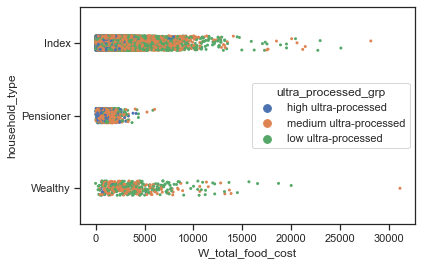

In [64]:
# Create a stripplot in seaborn for household_type and W_total_food_cost with ultra_processed_grp as hue

Y = "household_type"
X  = "W_total_food_cost"
hue  = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
g = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 3)

#### By income type

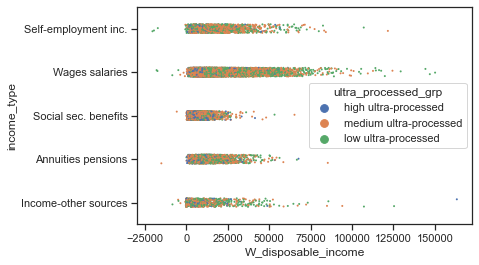

In [65]:
# Create a stripplot in seaborn for income_type and W_disposable_income with ultra_processed_grp as hue

Y = "income_type"
X = "W_disposable_income"
hue  = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 2)

# Exporting the scatter plot with axis showing
plt.savefig("Stripplot_income_ityoe.png", bbox_inches='tight') 

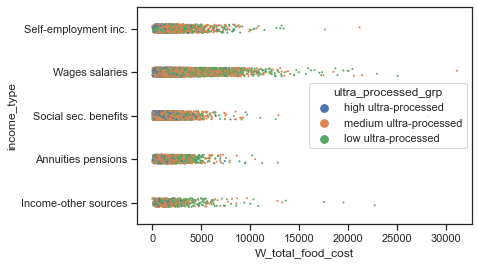

In [66]:
# Create a stripplot in seaborn for income_type and W_total_food_cost with ultra_processed_grp as hue

Y = "income_type"
X  = "W_total_food_cost"
hue  = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 2)

#### By people group

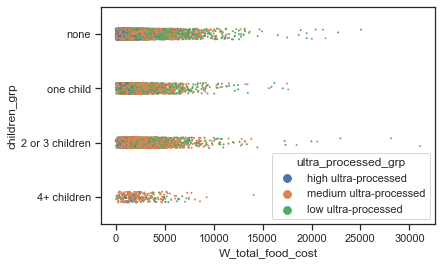

In [67]:
# Create a stripplot in seaborn for children_grp and W_dtotal_food_cost with ultra_processed_grp as hue

Y = "children_grp"
X  = "W_total_food_cost"
hue = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 2)

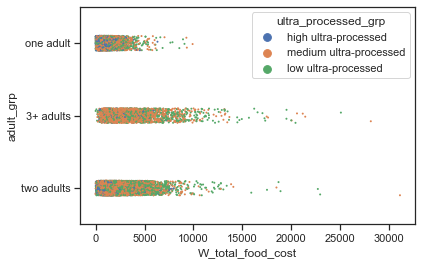

In [68]:
# Create a stripplot in seaborn for adult_grp and W_total_food_cost with ultra_processed_grp as hue

Y = "adult_grp"
X  = "W_total_food_cost"
hue  = "ultra_processed_grp"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, data = df, hue = hue, size = 2)

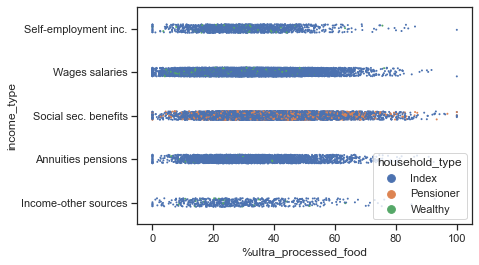

In [69]:
# Create a stripplot in seaborn for income_type and %ultra_processed_food with household_type as hue

Y = "income_type"
X  = "%ultra_processed_food"
hue = "household_type"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, hue = hue, data = df, size = 2)

# Exporting the scatter plot with axis showing
plt.savefig("Stripplot_perultra_itype.png", bbox_inches='tight') 

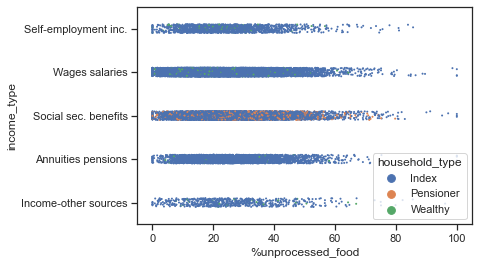

In [70]:
# Create a stripplot in seaborn for income_type and %ultra_processed_food with household_type as hue

Y = "income_type"
X  = "%unprocessed_food"
hue = "household_type"
df = df_lcf_analysisW

sns.set(style = "ticks")
fg = sns.stripplot(y = Y, x = X, hue = hue, data = df, size = 2)

The proportion of ultra-processed products bought by households with higher disposable incomes and households that spend more on food overall is lower.

---

## 09. Exporting the dataframe as lcf_eda

In [71]:
# Export the dataframe into the Prepared_Data folder as lcf_analysis_eda.csv and lcf_analysis_eda.pkl
df_lcf_analysis.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_analysis_eda.csv'))
df_lcf_analysis.to_pickle(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_analysis_eda.pkl'))

---

## 10. Questions

### Previous questions
1. How does consumption of ultra-processed foods, etc vary throughout the year and over the years?
2. Is there a rise in the proportion of ultra-processed foods being consumed?
3. Is there a correlation between ultra-processed food consumption and BMI?
4. Is there a link between income / expenditure and the consumption of ultra-processed foods?
5. Are there common features among households consuming different types of foods?
6. Are different regions consuming different types of foods?

Answers to questions 1, 2, 3 and 6 not explored in this analysis.

#### Answering Question's 4 and 5

Yes there is a link between income and the consumption of ultra-processed foods. The exploratory analysis shows differences between households with different income sources and also depending on the number of children in the household.<br>

There are also common features with the exploratory analysis suggesting that families with 4 or more children, pensioner households and households on social security benefits buy more ultra-processed food than other households. One thing these households have in common is lower gross incomes and less dispoable income.<br>

Therefore I would like to explore these households in more detail to see if there is a siginificant difference bewteen them and other households. <br>

**Hypothesis: If a household has a higher disposable income, then they buy less ultra-processed foods compared to other food categories.**

### New questions
Look at the households spending a larger proportion of their disposable income and total food costs on ultra-processed food in more depth. Are there other similarities? 
* Look more in-depth at the household_type by income groups and further split the index group - not just wealthy, index and pensioner?
* What is the composition of households on social security benefits?
* Pensioner housholds appear to be mainly on social security benefits - is this correct? What is the situation in other pensioner households?
* How much do households spend per year and per quarter?
* Is the distribution spent on ultra-processed and unprocesssed foods evenly spread throughout the year?
* Are these households evenly spread throughout the UK?